## Introduction to predictive analysis: the sinking of Titanic

https://www.kaggle.com/c/titanic-gettingStarted

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

#### Loading the usual packages...  

In [1]:
import os
import sys
import time
import pickle
import itertools
import pandas as pd
import numpy as np
import pylab
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

#import seaborn as sns
import seaborn.apionly as sns

%matplotlib inline
#%matplotlib notebook
#matplotlib.rcdefaults()
#matplotlib.verbose.set_level('silent')

/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### Importing the datasets

In [2]:
datapath = "../datasets/"
outputs = "../outputs/"

In [3]:
df_train = pd.read_csv(os.path.join(datapath,'Kaggle/kaggle_titanic_train.csv'))
df_test = pd.read_csv(os.path.join(datapath,'Kaggle/kaggle_titanic_test.csv'))

#### Exploring Data

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df_train.dtypes[df_train.dtypes.map(lambda x: x=='int64')]

PassengerId    int64
Survived       int64
Pclass         int64
SibSp          int64
Parch          int64
dtype: object

In [8]:
df_train.dtypes[df_train.dtypes.map(lambda x: x=='float64')]

Age     float64
Fare    float64
dtype: object

In [9]:
df_train.dtypes[df_train.dtypes.map(lambda x: x=='object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [10]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
for cat in df_train.columns:
    print("Number of levels in category '{0}': \b {1:2.2f} ".format(cat, df_train[cat].unique().size))

Number of levels in category 'PassengerId':  891.00 
Number of levels in category 'Survived':  2.00 
Number of levels in category 'Pclass':  3.00 
Number of levels in category 'Name':  891.00 
Number of levels in category 'Sex':  2.00 
Number of levels in category 'Age':  89.00 
Number of levels in category 'SibSp':  7.00 
Number of levels in category 'Parch':  7.00 
Number of levels in category 'Ticket':  681.00 
Number of levels in category 'Fare':  248.00 
Number of levels in category 'Cabin':  148.00 
Number of levels in category 'Embarked':  4.00 


#### Describing the numeric values

In [12]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Examining the categorical values

In [13]:
# There are many values for name and ticket

for cat in ['Sex', 'Survived', 'Pclass', 'SibSp', 'Embarked', 'Cabin']:
    print("Unique values for category '{0}': \b {1} ".format(cat, df_train[cat].unique()))

Unique values for category 'Sex':  ['male' 'female'] 
Unique values for category 'Survived':  [0 1] 
Unique values for category 'Pclass':  [3 1 2] 
Unique values for category 'SibSp':  [1 0 3 4 2 5 8] 
Unique values for category 'Embarked':  ['S' 'C' 'Q' nan] 
Unique values for category 'Cabin':  [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49' 'F4'
 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77' 'E67'
 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106' 'C65'
 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91' 'E40'
 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34' 'C104'
 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79' 'E25'
 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68' 'A10'
 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A2

In [14]:
print(df_train.Survived.value_counts())

0    549
1    342
Name: Survived, dtype: int64


In [15]:
df_train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [16]:
df_by_sex = df_train.groupby('Sex')
df_by_sex.describe()

Age                                                       Fare  \
        count       mean        std   min   25%   50%   75%   max  count   
Sex                                                                        
female  261.0  27.915709  14.110146  0.75  18.0  27.0  37.0  63.0  314.0   
male    453.0  30.726645  14.678201  0.42  21.0  29.0  39.0  80.0  577.0   

                  ...  SibSp      Survived                                     \
             mean ...    75%  max    count      mean       std  min  25%  50%   
Sex               ...                                                           
female  44.479818 ...    1.0  8.0    314.0  0.742038  0.438211  0.0  0.0  1.0   
male    25.523893 ...    0.0  8.0    577.0  0.188908  0.391775  0.0  0.0  0.0   

                  
        75%  max  
Sex               
female  1.0  1.0  
male    0.0  1.0  

[2 rows x 56 columns]

In [17]:
df_train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [18]:
df_train.groupby(['Pclass']).Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [19]:
df_train.groupby(['Pclass']).Sex.value_counts()

Pclass  Sex   
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
Name: Sex, dtype: int64

In [20]:
print('Male')
for i in range(1,4):
    print(i, len(df_train[ (df_train['Sex'] == 'male') & (df_train['Pclass'] == i) ]))
print()
print('Female')
for i in range(1,4):
    print(i, len(df_train[ (df_train['Sex'] == 'female') & (df_train['Pclass'] == i) ]))

Male
1 122
2 108
3 347

Female
1 94
2 76
3 144


In [21]:
df_by_class = df_train.groupby('Pclass')
df_by_class.describe()

Age                                                       Fare  \
        count       mean        std   min   25%   50%   75%   max  count   
Pclass                                                                     
1       186.0  38.233441  14.802856  0.92  27.0  37.0  49.0  80.0  216.0   
2       173.0  29.877630  14.001077  0.67  23.0  29.0  36.0  70.0  184.0   
3       355.0  25.140620  12.495398  0.42  18.0  24.0  32.0  74.0  491.0   

                  ...  SibSp      Survived                                     \
             mean ...    75%  max    count      mean       std  min  25%  50%   
Pclass            ...                                                           
1       84.154687 ...    1.0  3.0    216.0  0.629630  0.484026  0.0  0.0  1.0   
2       20.662183 ...    1.0  3.0    184.0  0.472826  0.500623  0.0  0.0  0.0   
3       13.675550 ...    1.0  8.0    491.0  0.242363  0.428949  0.0  0.0  0.0   

                  
        75%  max  
Pclass            
1       1.0  1.0  
2       1.0  1.0  
3       0.0  1.0  

[3 rows x 48 columns]

In [22]:
df_train.groupby(['Pclass','Sex']).Survived.value_counts()

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

In [23]:
id = pd.crosstab([df_train.Pclass, df_train.Sex], df_train.Survived.astype(float))
id.columns = (['No', 'Yes'])
id.columns.name = "Survived"
id.div(id.sum(1).astype(float), 0)

Survived             No       Yes
Pclass Sex                       
1      female  0.031915  0.968085
       male    0.631148  0.368852
2      female  0.078947  0.921053
       male    0.842593  0.157407
3      female  0.500000  0.500000
       male    0.864553  0.135447

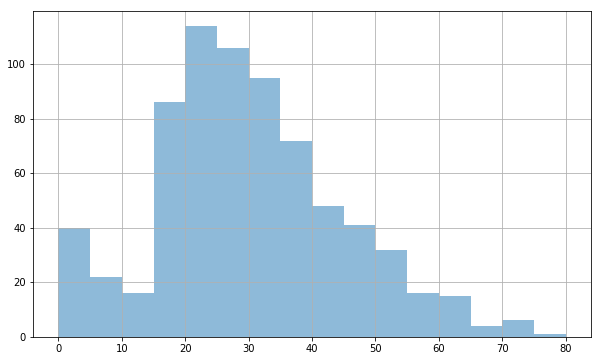

In [24]:
#df_train['Age'].hist()
df_train['Age'].dropna().hist(bins=16, range=(0,80), alpha = .5, figsize=(10,6))

In [25]:
ser, bins = pd.qcut(df_train.Age.dropna(), 5, retbins=True, labels=False)
print(bins)
df_train.groupby(ser).Survived.value_counts()

[  0.42  19.    25.    31.8   41.    80.  ]


Age  Survived
0.0  0           85
     1           79
1.0  0           92
     1           45
2.0  0           77
     1           50
3.0  0           81
     1           63
4.0  0           89
     1           53
Name: Survived, dtype: int64

#### Feature engineering

In [26]:
df_train['Gender'] = df_train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
df_test['Gender'] = df_test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

#### Filling the null values for Age

In [27]:
print(len(df_train[df_train['Age'].isnull()]))
print(len(df_test[df_test['Age'].isnull()]))

177
86


In [28]:
df_train['AgeFill'] = df_train['Age']
df_test['AgeFill'] = df_test['Age']

In [29]:
df_train[df_train['Age'].isnull()][['Gender','Pclass','Age','AgeFill']].head(4)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,NaN
17,1,2,NaN,NaN
19,0,3,NaN,NaN
26,1,3,NaN,NaN


In [30]:
median_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = df_train[(df_train['Gender'] == i) & (df_train['Pclass'] == j+1)]['Age'].dropna().median()

median_ages

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

In [31]:
for i in range(0, 2):
    for j in range(0, 3):
        df_train.loc[(df_train.Age.isnull()) & (df_train.Gender == i) & (df_train.Pclass == j+1),'AgeFill'] = median_ages[i,j]
        df_test.loc[(df_test.Age.isnull()) & (df_test.Gender == i) & (df_test.Pclass == j+1),'AgeFill'] = median_ages[i,j]

In [32]:
df_train[df_train['Age'].isnull()][['Gender','Pclass','Age','AgeFill']].head(4)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0


#### One-Hot-Enconding the field "Embarked"

In [33]:
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
lb = LabelBinarizer()
mlb = MultiLabelBinarizer()

In [34]:
df_train.groupby(['Embarked']).Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [35]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeFill
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,38.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,62.0


In [36]:
df_train[59:64]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeFill
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S,1,11.0
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C,1,22.0
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN,0,38.0
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S,1,45.0
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S,1,4.0


In [37]:
df_train[826:832]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeFill
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S,1,25.00
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C,1,1.00
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q,1,25.00
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.0000,B28,NaN,0,62.00
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.00,1,0,2659,14.4542,NaN,C,0,15.00
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,1,0.83


In [38]:
df_train.groupby(['Embarked']).Fare.mean()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

#### Associating the missing values to the most likely class

In [39]:
df_train['Embarked'] = df_train['Embarked'].map({np.nan:1,'C':1, 'Q':2,'S':3} ).astype(int)
df_test['Embarked'] = df_test['Embarked'].map({np.nan:1,'C':1, 'Q':2,'S':3} ).astype(int)

In [40]:
embarked = pd.DataFrame(lb.fit_transform(df_train['Embarked'].values), columns=['Emb1','Emb2','Emb3'])
df_train = pd.concat([df_train, embarked], axis=1)

In [41]:
embarked = pd.DataFrame(lb.fit_transform(df_test['Embarked'].values), columns=['Emb1','Emb2','Emb3'])
df_test = pd.concat([df_test, embarked], axis=1)

#### One-Hot-Enconding the field "Cabin"

In [42]:
df_train['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
C22 C26        3
D              3
E101           3
F2             3
F33            3
E33            2
E121           2
B77            2
F G73          2
D33            2
C125           2
E44            2
B58 B60        2
D36            2
C65            2
E25            2
C92            2
E67            2
B35            2
D26            2
B22            2
B51 B53 B55    2
D35            2
B20            2
B5             2
E24            2
C126           2
              ..
A23            1
A19            1
B80            1
A31            1
C82            1
D10 D12        1
A20            1
C50            1
T              1
D28            1
D30            1
B73            1
C110           1
C87            1
A34            1
C101           1
C95            1
B82 B84        1
A10            1
C47            1
E50            1
A24            1
D46            1
B38            1
D11            1
E40            1
E34            1
B101          

In [43]:
CabinTrans = pd.DataFrame(mlb.fit_transform([{str(val)} for val in df_train['Cabin'].values]))

In [44]:
CabinTrans

,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
#Give up using the feature
#df_train = pd.concat([df_train, CabinTrans], axis=1)

#### Creating a feature for number of relatives

In [46]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train['Age*Class'] = df_train.AgeFill * df_train.Pclass

df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']
df_test['Age*Class'] = df_test.AgeFill * df_test.Pclass

#### Discarding unused columns for predictive analysis

In [47]:
df_train2 = df_train.drop(['Age','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df_train2 = df_train2.dropna()

df_test2 = df_test.drop(['Age','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df_test2 = df_test2.dropna()

In [48]:
df_train2.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Gender,AgeFill,Emb1,Emb2,Emb3,FamilySize,Age*Class
0,1,0,3,1,0,7.2500,1,22.0,0,0,1,1,66.0
1,2,1,1,1,0,71.2833,0,38.0,1,0,0,1,38.0
2,3,1,3,0,0,7.9250,0,26.0,0,0,1,0,78.0
3,4,1,1,1,0,53.1000,0,35.0,0,0,1,1,35.0
4,5,0,3,0,0,8.0500,1,35.0,0,0,1,0,105.0


In [49]:
df_test2.head()

,PassengerId,Pclass,SibSp,Parch,Fare,Gender,AgeFill,Emb1,Emb2,Emb3,FamilySize,Age*Class
0,892,3,0,0,7.8292,1,34.5,0,1,0,0,103.5
1,893,3,1,0,7.0000,0,47.0,0,0,1,1,141.0
2,894,2,0,0,9.6875,1,62.0,0,1,0,0,124.0
3,895,3,0,0,8.6625,1,27.0,0,0,1,0,81.0
4,896,3,1,1,12.2875,0,22.0,0,0,1,2,66.0


In [50]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    417 non-null int64
Pclass         417 non-null int64
SibSp          417 non-null int64
Parch          417 non-null int64
Fare           417 non-null float64
Gender         417 non-null int64
AgeFill        417 non-null float64
Emb1           417 non-null int64
Emb2           417 non-null int64
Emb3           417 non-null int64
FamilySize     417 non-null int64
Age*Class      417 non-null float64
dtypes: float64(3), int64(9)
memory usage: 42.4 KB


In [51]:
df_train.rename(columns={'Survived': 'class'}, inplace=True)  #For the TPOT genetic algorithm we must rename our target 

#### Runnng correlation hypothesis:

In [52]:
y = df_train2.Survived
X = df_train2.Gender
model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.558118
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      890
Method:                           MLE   Df Model:                            0
Date:                sex, 26 mai 2017   Pseudo R-squ.:                  0.1619
Time:                        10:59:07   Log-Likelihood:                -497.28
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Gender        -1.4571      0.106    -13.701      0.000      -1.666      -1.249


In [53]:
y = df_train2.Survived
X = df_train2[['Gender','Pclass','AgeFill']]
model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.529672
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      888
Method:                           MLE   Df Model:                            2
Date:                sex, 26 mai 2017   Pseudo R-squ.:                  0.2046
Time:                        10:59:07   Log-Likelihood:                -471.94
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 1.910e-53
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Gender        -2.1764      0.170    -12.829      0.000      -2.509      -1.844
Pclass        -0.0671      0.

#### Preparing Data for predictions

In [54]:
train_data = df_train2.values
print(train_data.shape)
train_data

(891, 13)


array([[   1. ,    0. ,    3. , ...,    1. ,    1. ,   66. ],
       [   2. ,    1. ,    1. , ...,    0. ,    1. ,   38. ],
       [   3. ,    1. ,    3. , ...,    1. ,    0. ,   78. ],
       ..., 
       [ 889. ,    0. ,    3. , ...,    1. ,    3. ,   64.5],
       [ 890. ,    1. ,    1. , ...,    0. ,    0. ,   26. ],
       [ 891. ,    0. ,    3. , ...,    0. ,    0. ,   96. ]])

In [55]:
test_data = df_test2.values
print(test_data.shape)
test_data

(417, 12)


array([[  8.92000000e+02,   3.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.03500000e+02],
       [  8.93000000e+02,   3.00000000e+00,   1.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   1.41000000e+02],
       [  8.94000000e+02,   2.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.24000000e+02],
       ..., 
       [  1.30700000e+03,   3.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   0.00000000e+00,   1.15500000e+02],
       [  1.30800000e+03,   3.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   0.00000000e+00,   7.50000000e+01],
       [  1.30900000e+03,   3.00000000e+00,   1.00000000e+00, ...,
          0.00000000e+00,   2.00000000e+00,   7.50000000e+01]])

#### Adjusting features scales:   
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html  

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(train_data[0::,2::])
X_test = scaler.fit_transform(test_data[0::,1::])

y_train = train_data[0::,1]

In [57]:
X_train[0]

array([ 0.82737724,  0.43279337, -0.47367361, -0.50244517,  0.73769513,
       -0.53489116, -0.48557557, -0.30756234,  0.61930636,  0.05915988,
        0.10799818])

In [58]:
X_test[0]

array([ 0.87532977, -0.50021819, -0.40080432, -0.49781052,  0.75735388,
        0.4054536 , -0.56904264,  2.83993264, -1.34817194, -0.55430942,
        1.65753892])

In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(891, 11)
(417, 11)
(891,)


http://stats.stackexchange.com/questions/95797/how-to-split-the-dataset-for-cross-validation-learning-curve-and-final-evaluat  
http://scikit-learn.org/stable/modules/cross_validation.html  

#### Importing modules for cross validation and evaluation of the models

In [60]:
from sklearn import model_selection

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score

#### Creating functions to help evaluate the models

In [61]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def clf_eval(clf, X, y_true, classes=['Não Sobreviveu', 'Sobreviveu']):
    y_pred = clf.predict(X)
    clf_matrix = confusion_matrix(y_true, y_pred)
    print('Classification Report')
    print(classification_report(y_true, y_pred, target_names=classes))
    print('ROC Score: {}'.format(roc_auc_score(y_true, y_pred)))
    print('Accuracy Score: {}'.format(accuracy_score(y_true, y_pred)))
    print('Average Precision Score: {}'.format(average_precision_score(y_true, y_pred)))
    print('f1 Score: {}'.format(f1_score(y_true, y_pred)))
    plot_confusion_matrix(clf_matrix, classes=classes)
    return roc_auc_score(y_true, y_pred)

#### Creating cross-validation with subsets (70% train / 30% test):  

http://scikit-learn.org/stable/modules/cross_validation.html  
http://www.analyticsvidhya.com/blog/2015/05/k-fold-cross-validation-simple/  
http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html  
http://stackoverflow.com/questions/25375203/identical-learning-curves-on-subsequent-runs-using-shufflesplit  
http://stackoverflow.com/questions/28064634/random-state-pseudo-random-numberin-scikit-learn  

In [62]:
X_traincv, X_testcv, y_traincv, y_testcv = model_selection.train_test_split(X_train,
                                                                            y_train,
                                                                            test_size=0.3,
                                                                            random_state=0)

In [63]:
print(X_traincv.shape)
print(X_testcv.shape)
print(y_traincv.shape)
print(y_testcv.shape)

(623, 11)
(268, 11)
(623,)
(268,)


#### Check if classes are balanced

In [64]:
print(len(y_traincv[y_traincv == 0]))
print(len(y_traincv[y_traincv == 1]))

381
242


#### Oversampling the minority class  
http://contrib.scikit-learn.org/imbalanced-learn/  

In [65]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(kind='regular')
X_traincv_res, y_traincv_res = smote.fit_sample(X_traincv, y_traincv)

In [66]:
print(len(y_traincv_res[y_traincv_res == 0]))
print(len(y_traincv_res[y_traincv_res == 1]))

381
381


#### Creating another train/test set using k-fold or other cross-validation method:  

In [67]:
cv = model_selection.StratifiedKFold(n_splits=10)

def mean_scores_cv(clf, cv, X, y):
    scores = model_selection.cross_val_score(clf, X, y, 
                                              scoring=None, 
                                              cv=cv, 
                                              n_jobs=1,
                                              verbose=0,
                                              fit_params=None,
                                              pre_dispatch='2*n_jobs')
    return scores.mean()

#### Choosing the best parameters using GridSearchCV and RandomizedSearchCV  
http://scikit-learn.org/stable/modules/grid_search.html  

In [68]:
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm


estimator = svm.SVC()
cv = model_selection.StratifiedKFold(n_splits=10)

kernels = ['linear', 'poly']
Cs = np.linspace(0.1,2,10)
degrees = [2,3,4]
gammas = np.logspace(-5, 0, 10)

param_grid=dict(kernel=kernels, C=Cs, gamma=gammas, degree=degrees)

clf_svc = model_selection.RandomizedSearchCV(estimator=estimator,
                                             cv=cv,
                                             param_distributions=param_grid, 
                                             n_jobs=-1).fit(X_train, y_train)

with open(os.path.join(outputs,'best_parameters_svm.pickle'), 'wb') as f:
    pickle.dump(clf_svc,f)

with open(os.path.join(outputs,'best_parameters_svm.pickle'), 'rb') as f:
    clf_svc = pickle.load(f)

print(clf_svc.best_score_)
print(clf_svc.best_estimator_.kernel)
print(clf_svc.best_estimator_.C)
print(clf_svc.best_estimator_.degree)
print(clf_svc.best_estimator_.gamma)

0.786756453423
linear
0.1
4
0.0774263682681


#### Testing some classifiers:  
Note that only the first classifier (svm) had its parameters optimized  

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.83      0.83      0.83       168
    Sobreviveu       0.72      0.71      0.71       100

   avg / total       0.79      0.79      0.79       268

ROC Score: 0.7716666666666667
Accuracy Score: 0.7873134328358209
Average Precision Score: 0.7676903361977989
f1 Score: 0.7135678391959798
Confusion matrix, without normalization
[[140  28]
 [ 29  71]]


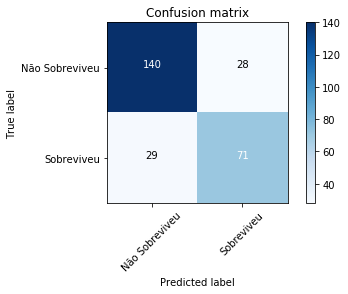

In [69]:
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
clf_svc2 = svm.SVC(kernel=clf_svc.best_estimator_.kernel,
                   C=clf_svc.best_estimator_.C,
                   degree=clf_svc.best_estimator_.degree, 
                   gamma=clf_svc.best_estimator_.gamma, 
                   coef0=0.0, 
                   shrinking=True, 
                   probability=False, 
                   tol=0.001, 
                   cache_size=200, 
                   class_weight=None, 
                   verbose=False, 
                   max_iter=-1, 
                   random_state=0).fit(X_traincv, y_traincv)

roc_svc2 = clf_eval(clf_svc2, X_testcv, y_testcv)

For this first classifier, we'll also display the learning curve  
http://scikit-learn.org/stable/modules/generated/sklearn.learning_curve.learning_curve.html  

In [70]:
#http://scikit-learn.org/stable/modules/generated/sklearn.learning_curve.learning_curve.html

def plot_learning_curve(estimator, 
                        title, 
                        X, 
                        y, 
                        ylim=None, 
                        cv=None,
                        n_jobs=-1, 
                        train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure(figsize=(16,8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = model_selection.learning_curve(estimator, 
                                                            X, y, cv=cv, 
                                                            n_jobs=n_jobs, 
                                                            train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

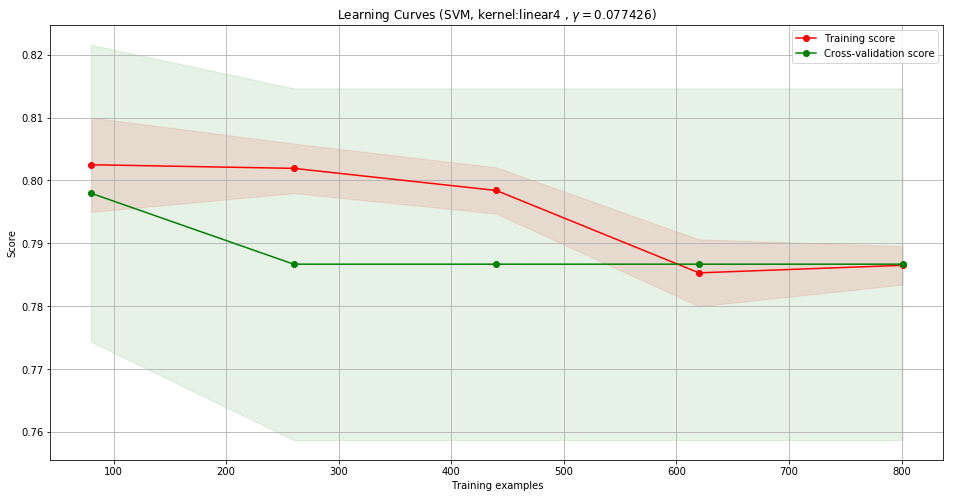

In [71]:
title = 'Learning Curves (SVM, kernel:{1}{0} , $\gamma={2:.6f}$)'.format(clf_svc.best_estimator_.degree,
                                                                         clf_svc.best_estimator_.kernel,
                                                                         clf_svc.best_estimator_.gamma)
graph = plot_learning_curve(clf_svc2, title, X_train, y_train, cv=cv)
#matplotlib.rcdefaults()
#matplotlib.verbose.set_level('silent')
graph.show()

Agora vamos testar outros estimadores:

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.83      0.86      0.85       168
    Sobreviveu       0.75      0.70      0.73       100

   avg / total       0.80      0.80      0.80       268

ROC Score: 0.7815476190476192
Accuracy Score: 0.8022388059701493
Average Precision Score: 0.7823142352752367
f1 Score: 0.7253886010362695
Confusion matrix, without normalization
[[145  23]
 [ 30  70]]


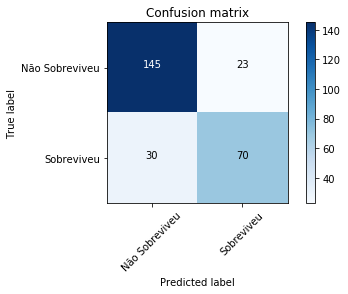

In [72]:
#http://scikit-learn.org/stable/modules/ensemble.html
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
#http://blog.yhathq.com/posts/random-forests-in-python.html
#http://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=300, 
                                criterion='gini', 
                                max_depth=None, 
                                min_samples_split=2, 
                                min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, 
                                max_features='auto', 
                                max_leaf_nodes=None, 
                                bootstrap=True, 
                                oob_score=False, 
                                n_jobs=-1, 
                                random_state=0, 
                                verbose=0, 
                                warm_start=False, 
                                class_weight=None).fit(X_traincv, y_traincv)



roc_rf = clf_eval(clf_rf, X_testcv, y_testcv)

Plotting the confidence intervals  
https://github.com/scikit-learn-contrib/forest-confidence-interval  

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


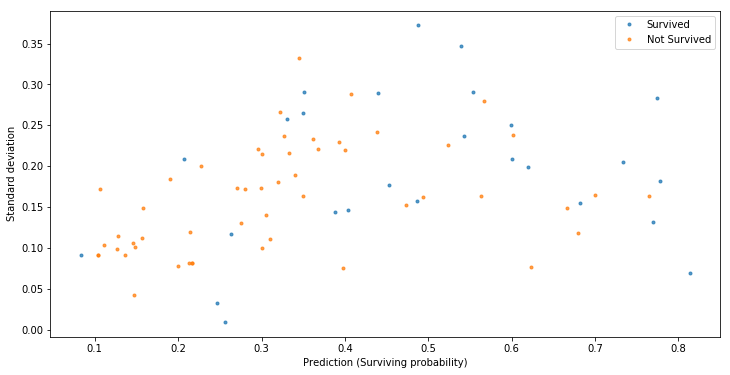

In [73]:
import forestci as fci

y_predicted = clf_rf.predict_proba(X_testcv)

# calculate inbag and unbiased variance
inbag = fci.calc_inbag(X_traincv.shape[0], clf_rf)
unbiased = fci.random_forest_error(clf_rf, inbag,X_traincv, X_testcv)

# Plot forest prediction for survivors and standard deviation for estimates
# Blue points are survivors; Green points are non-survivors
idx = np.where(y_testcv == 1)[0]

plt.figure(figsize=(12,6))
plt.errorbar(y_predicted[idx, 1], 
             np.sqrt(unbiased[idx]),
             fmt='.', 
             alpha=0.75, 
             label='Survived')

idx = np.where(y_testcv == 0)[0]
plt.errorbar(y_predicted[idx, 1],
             np.sqrt(unbiased[idx]),
             fmt='.', 
             alpha=0.75, 
             label='Not Survived')

plt.xlabel('Prediction (Surviving probability)')
plt.ylabel('Standard deviation')
plt.legend()
plt.show()

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.80      0.86      0.83       168
    Sobreviveu       0.73      0.65      0.69       100

   avg / total       0.78      0.78      0.78       268

ROC Score: 0.7535714285714286
Accuracy Score: 0.7798507462686567
Average Precision Score: 0.7554670467885293
f1 Score: 0.6878306878306878
Confusion matrix, without normalization
[[144  24]
 [ 35  65]]


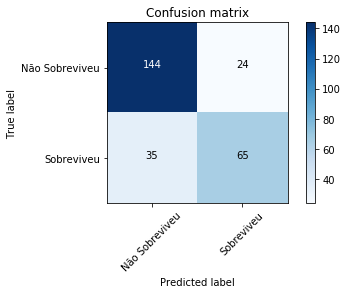

In [74]:
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

clf_dtc = DecisionTreeClassifier(criterion='gini', 
                                 splitter='best', 
                                 max_depth=None, 
                                 min_samples_split=2, 
                                 min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, 
                                 max_features=None, 
                                 random_state=0, 
                                 max_leaf_nodes=None, 
                                 class_weight=None, 
                                 presort=False).fit(X_traincv, y_traincv)

roc_dtc = clf_eval(clf_dtc, X_testcv, y_testcv)

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.83      0.83      0.83       168
    Sobreviveu       0.72      0.72      0.72       100

   avg / total       0.79      0.79      0.79       268

ROC Score: 0.7766666666666666
Accuracy Score: 0.7910447761194029
Average Precision Score: 0.7722388059701493
f1 Score: 0.72
Confusion matrix, without normalization
[[140  28]
 [ 28  72]]


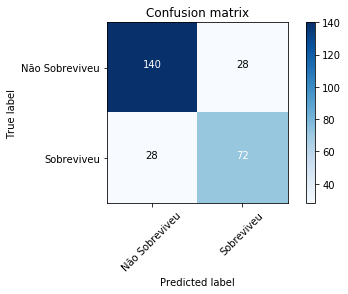

In [75]:
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html
from sklearn.ensemble import ExtraTreesClassifier

clf_etc = ExtraTreesClassifier(n_estimators=300,
                               max_depth=None,
                               min_samples_split=2,
                               random_state=0).fit(X_traincv, y_traincv)

roc_etc = clf_eval(clf_etc, X_testcv, y_testcv)

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.85      0.88      0.86       168
    Sobreviveu       0.78      0.74      0.76       100

   avg / total       0.82      0.82      0.82       268

ROC Score: 0.8075
Accuracy Score: 0.8246268656716418
Average Precision Score: 0.8079811468970934
f1 Score: 0.7589743589743589
Confusion matrix, without normalization
[[147  21]
 [ 26  74]]


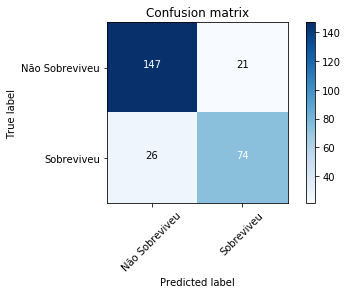

In [76]:
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
from sklearn.ensemble import AdaBoostClassifier

clf_abc = AdaBoostClassifier(base_estimator=None,
                             n_estimators=200,
                             learning_rate=0.1,
                             algorithm='SAMME.R',
                             random_state=0).fit(X_traincv, y_traincv)

roc_abc = clf_eval(clf_abc, X_testcv, y_testcv)

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.84      0.86      0.85       168
    Sobreviveu       0.75      0.73      0.74       100

   avg / total       0.81      0.81      0.81       268

ROC Score: 0.7935714285714286
Accuracy Score: 0.8097014925373134
Average Precision Score: 0.7916617941221726
f1 Score: 0.7411167512690355
Confusion matrix, without normalization
[[144  24]
 [ 27  73]]


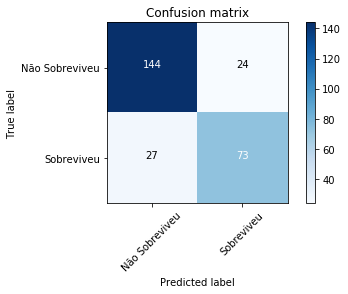

In [77]:
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier

clf_gbc = GradientBoostingClassifier(loss='deviance',
                                     learning_rate=0.1,
                                     n_estimators=200,
                                     subsample=1.0, 
                                     min_samples_split=2, 
                                     min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, 
                                     max_depth=3, 
                                     init=None, 
                                     random_state=0, 
                                     max_features=None, 
                                     verbose=0, 
                                     max_leaf_nodes=None, 
                                     warm_start=False, 
                                     presort='auto').fit(X_traincv, y_traincv)

roc_gbc = clf_eval(clf_gbc, X_testcv, y_testcv)

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.82      0.91      0.86       168
    Sobreviveu       0.82      0.67      0.74       100

   avg / total       0.82      0.82      0.82       268

ROC Score: 0.7903571428571428
Accuracy Score: 0.8208955223880597
Average Precision Score: 0.805103749544958
f1 Score: 0.7362637362637363
Confusion matrix, without normalization
[[153  15]
 [ 33  67]]


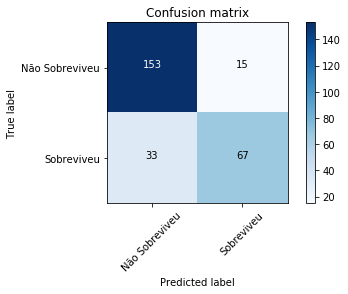

In [78]:
#https://github.com/dmlc/xgboost/tree/master/python-package  
#https://xgboost.readthedocs.io/en/latest/build.html#building-on-ubuntu-debian
#http://xgboost.readthedocs.io/en/latest/build.html#python-package-installation  
#http://xgboost.readthedocs.io/en/latest/parameter.html  
#https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/  
#https://www.kaggle.com/cbrogan/titanic/xgboost-example-python/run/1620  
#http://xgboost.readthedocs.io/en/latest//python/python_api.html#module-xgboost.sklearn

import xgboost

clf_xgb = xgboost.sklearn.XGBClassifier(base_score=0.5,
                                        learning_rate=0.1,
                                        n_estimators=250,
                                        max_delta_step=0,
                                        max_depth=3,
                                        min_child_weight=1,
                                        missing=None,
                                        gamma=0,
                                        subsample=1,
                                        colsample_bylevel=1,
                                        colsample_bytree=1,
                                        objective= 'binary:logitraw',
                                        #objective='multi:softprob',
                                        reg_alpha=0, 
                                        reg_lambda=1,
                                        nthread=-1,
                                        scale_pos_weight=1,
                                        seed=0,
                                        silent=False,).fit(X_traincv, y_traincv)

roc_xgb = clf_eval(clf_xgb, X_testcv, y_testcv)

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.82      0.83      0.83       168
    Sobreviveu       0.71      0.70      0.71       100

   avg / total       0.78      0.78      0.78       268

ROC Score: 0.7666666666666667
Accuracy Score: 0.7835820895522388
Average Precision Score: 0.7631130063965885
f1 Score: 0.7070707070707072
Confusion matrix, without normalization
[[140  28]
 [ 30  70]]


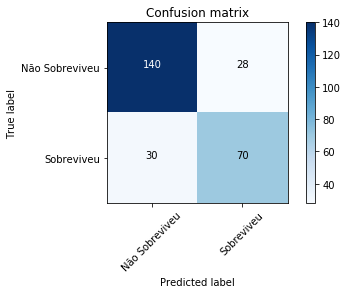

In [79]:
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
from sklearn.linear_model import SGDClassifier

clf_sgdc = SGDClassifier(loss='hinge',
                         penalty='l2', 
                         alpha=0.0001,
                         l1_ratio=0.15, 
                         fit_intercept=True,
                         n_iter=200, 
                         shuffle=True,
                         verbose=0,
                         epsilon=0.1,
                         n_jobs=-1,
                         random_state=0,
                         learning_rate='optimal',
                         eta0=0.0, 
                         power_t=0.5,
                         class_weight=None,
                         warm_start=False, 
                         average=False).fit(X_traincv, y_traincv)

roc_sgdc = clf_eval(clf_sgdc, X_testcv, y_testcv)

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.84      0.85      0.84       168
    Sobreviveu       0.74      0.72      0.73       100

   avg / total       0.80      0.80      0.80       268

ROC Score: 0.7855952380952381
Accuracy Score: 0.8022388059701493
Average Precision Score: 0.7833728265887059
f1 Score: 0.7309644670050761
Confusion matrix, without normalization
[[143  25]
 [ 28  72]]


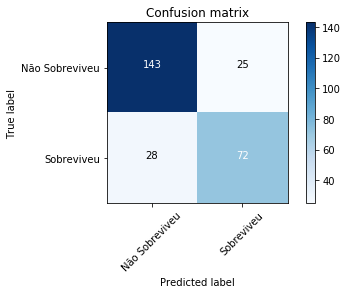

In [80]:
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html
from sklearn.linear_model import RidgeClassifier

clf_rdg = RidgeClassifier(alpha=1.0, 
                          fit_intercept=True, 
                          normalize=False, 
                          copy_X=True, 
                          max_iter=None, 
                          tol=0.001, 
                          class_weight=None, 
                          solver='auto', 
                          random_state=0).fit(X_traincv, y_traincv)

roc_rdg = clf_eval(clf_rdg, X_testcv, y_testcv)

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.82      0.84      0.83       168
    Sobreviveu       0.72      0.68      0.70       100

   avg / total       0.78      0.78      0.78       268

ROC Score: 0.7596428571428572
Accuracy Score: 0.7798507462686567
Average Precision Score: 0.7575962293794187
f1 Score: 0.6974358974358974
Confusion matrix, without normalization
[[141  27]
 [ 32  68]]


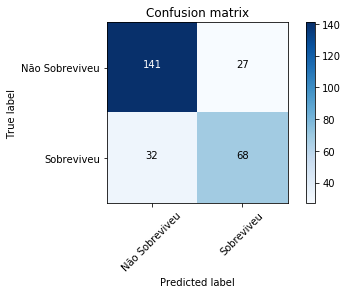

In [81]:
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron
from sklearn.linear_model import Perceptron

clf_pcp = Perceptron(penalty=None,
                     alpha=0.0001,
                     fit_intercept=True,
                     n_iter=200,
                     shuffle=True,
                     verbose=0,
                     eta0=1.0,
                     n_jobs=-1, 
                     random_state=0, 
                     class_weight=None, 
                     warm_start=False).fit(X_traincv, y_traincv)

roc_pcp = clf_eval(clf_pcp, X_testcv, y_testcv)

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.83      0.79      0.81       168
    Sobreviveu       0.67      0.73      0.70       100

   avg / total       0.77      0.76      0.77       268

ROC Score: 0.7578571428571428
Accuracy Score: 0.7649253731343284
Average Precision Score: 0.7502355196494591
f1 Score: 0.6985645933014354
Confusion matrix, without normalization
[[132  36]
 [ 27  73]]


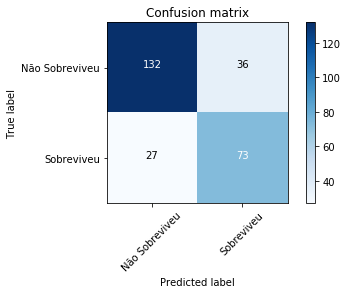

In [82]:
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html
from sklearn.linear_model import PassiveAggressiveClassifier

clf_pac = PassiveAggressiveClassifier(C=1.0, 
                                      fit_intercept=True, 
                                      n_iter=200, 
                                      shuffle=True, 
                                      verbose=0, 
                                      loss='hinge', 
                                      n_jobs=-1, 
                                      random_state=0, 
                                      warm_start=False, 
                                      class_weight=None).fit(X_traincv, y_traincv)

roc_pac = clf_eval(clf_pac, X_testcv, y_testcv)

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.84      0.86      0.85       168
    Sobreviveu       0.75      0.72      0.73       100

   avg / total       0.80      0.81      0.81       268

ROC Score: 0.7885714285714286
Accuracy Score: 0.8059701492537313
Average Precision Score: 0.7872388059701493
f1 Score: 0.7346938775510204
Confusion matrix, without normalization
[[144  24]
 [ 28  72]]


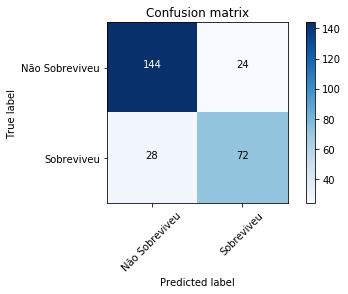

In [83]:
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(penalty='l2',
                            dual=False, 
                            tol=0.0001, 
                            C=1.0, 
                            fit_intercept=True, 
                            intercept_scaling=1, 
                            class_weight=None, 
                            random_state=0, 
                            solver='liblinear', 
                            max_iter=100, 
                            multi_class='ovr', 
                            verbose=0, 
                            warm_start=False, 
                            n_jobs=-1).fit(X_traincv, y_traincv)

roc_lr = clf_eval(clf_lr, X_testcv, y_testcv)

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.84      0.76      0.79       168
    Sobreviveu       0.65      0.75      0.69       100

   avg / total       0.77      0.75      0.76       268

ROC Score: 0.7529761904761904
Accuracy Score: 0.753731343283582
Average Precision Score: 0.7449176531137417
f1 Score: 0.6944444444444444
Confusion matrix, without normalization
[[127  41]
 [ 25  75]]


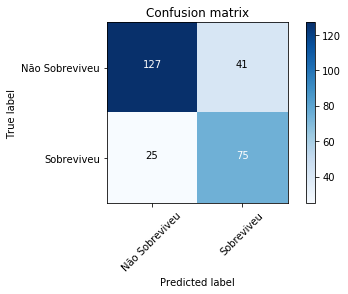

In [84]:
#http://scikit-learn.org/stable/modules/naive_bayes.html
#http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB().fit(X_traincv, y_traincv)

roc_gnb = clf_eval(clf_gnb, X_testcv, y_testcv)

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.80      0.79      0.79       168
    Sobreviveu       0.65      0.66      0.66       100

   avg / total       0.74      0.74      0.74       268

ROC Score: 0.7258333333333333
Accuracy Score: 0.7425373134328358
Average Precision Score: 0.7201655090882223
f1 Score: 0.6567164179104478
Confusion matrix, without normalization
[[133  35]
 [ 34  66]]


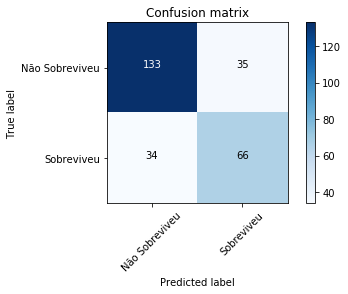

In [85]:
#http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html
from sklearn.naive_bayes import BernoulliNB

clf_bnb = BernoulliNB(alpha=1.0, 
                     binarize=0.0, 
                     fit_prior=True, 
                     class_prior=None).fit(X_traincv, y_traincv)

roc_bnb = clf_eval(clf_bnb, X_testcv, y_testcv)

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.82      0.89      0.86       168
    Sobreviveu       0.79      0.68      0.73       100

   avg / total       0.81      0.81      0.81       268

ROC Score: 0.7864285714285716
Accuracy Score: 0.8134328358208955
Average Precision Score: 0.7950503297466158
f1 Score: 0.7311827956989247
Confusion matrix, without normalization
[[150  18]
 [ 32  68]]


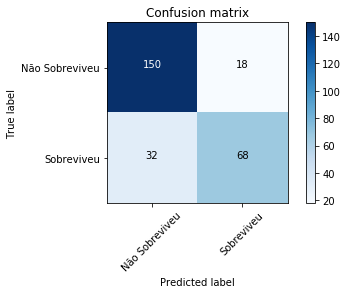

In [86]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=5,
                               weights='uniform', 
                               algorithm='auto', 
                               leaf_size=30, 
                               p=2, 
                               metric='minkowski', 
                               metric_params=None, 
                               n_jobs=1).fit(X_traincv, y_traincv)

roc_knn = clf_eval(clf_knn, X_testcv, y_testcv)

Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.80      0.92      0.86       168
    Sobreviveu       0.82      0.62      0.70       100

   avg / total       0.81      0.81      0.80       268

ROC Score: 0.7683333333333334
Accuracy Score: 0.8059701492537313
Average Precision Score: 0.788790259230165
f1 Score: 0.7045454545454546
Confusion matrix, without normalization
[[154  14]
 [ 38  62]]


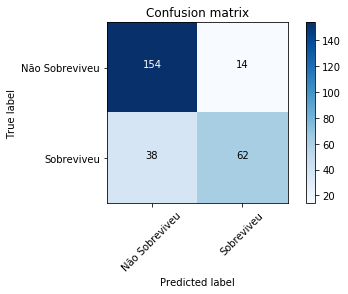

In [87]:
from sklearn.ensemble import BaggingClassifier

clf_bgc = BaggingClassifier().fit(X_traincv, y_traincv)

roc_bgc = clf_eval(clf_bgc, X_testcv, y_testcv)

#### Keras (with TensorFlow / Theano backends)

Using TensorFlow backend.


Keras using tensorflow backend
623 train samples
268 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               2400      
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 24)                4824      
_________________________________________________________________
dropout_3 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_4 (D

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=11, activation="relu", units=200)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=200, activation="relu", units=200)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=200, activation="relu", units=24)`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=24, activation="sigmoid", units=1)`


Train on 623 samples, validate on 268 samples
Epoch 1/10
623/623 [==============================] - 0s - loss: 0.6105 - acc: 0.6950 - val_loss: 0.4807 - val_acc: 0.7910
Epoch 2/10
623/623 [==============================] - 0s - loss: 0.4760 - acc: 0.8106 - val_loss: 0.4351 - val_acc: 0.8172
Epoch 3/10
623/623 [==============================] - 0s - loss: 0.4579 - acc: 0.8090 - val_loss: 0.4306 - val_acc: 0.8172
Epoch 4/10
623/623 [==============================] - 0s - loss: 0.4436 - acc: 0.8202 - val_loss: 0.4263 - val_acc: 0.8209
Epoch 5/10
623/623 [==============================] - 0s - loss: 0.4296 - acc: 0.8170 - val_loss: 0.4273 - val_acc: 0.8209
Epoch 6/10
623/623 [==============================] - 0s - loss: 0.4212 - acc: 0.8202 - val_loss: 0.4252

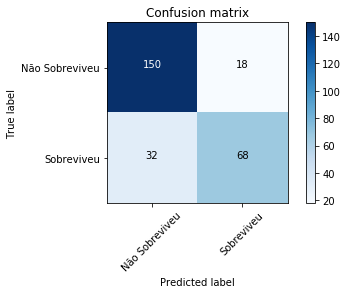

In [88]:
# https://elitedatascience.com/keras-tutorial-deep-learning-in-python
# http://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# https://www.kaggle.com/cstahl12/titanic/titanic-with-keras

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, RMSprop
from keras.utils.np_utils import to_categorical

print('Keras using {} backend'.format(keras.backend.backend()))  #https://keras.io/backend/

batch_size = 128
num_classes = 2
epochs = 20

x_train_kr = X_traincv.astype('float32') 
x_test_kr = X_testcv.astype('float32')

print(x_train_kr.shape[0], 'train samples')
print(x_test_kr.shape[0], 'test samples')

y_train_kr = y_traincv
y_test_kr = y_testcv

# convert class vectors to binary class matrices for categorical cross_entropy
#y_train_kr = to_categorical(y_traincv)
#y_test_kr = to_categorical(y_testcv)

model = Sequential()
model.add(Dense(input_dim=x_train_kr.shape[1], activation='relu', output_dim=200))
model.add(Dropout(0.2))
model.add(Dense(input_dim=200, activation='relu', output_dim=200))
model.add(Dropout(0.2))
model.add(Dense(input_dim=200, activation='relu', output_dim=24)) #activation='softmax'
model.add(Dropout(0.2))
model.add(Dense(input_dim=24,  activation='sigmoid', output_dim=1)) #kernel_initializer='uniform',
model.summary()


model.compile(loss='binary_crossentropy',
              #loss='categorical_crossentropy',
              #loss='mean_squared_error',
              optimizer=RMSprop(), 
              #optimizer=SGD(lr=0.001),
              metrics=['accuracy'])

history = model.fit(x_train_kr, y_train_kr,
                    batch_size=batch_size,
                    #epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_kr, y_test_kr))

score = model.evaluate(x_test_kr, y_test_kr, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


y_pred = model.predict_classes(x_test_kr) #y_pred = np.around(model.predict(x_test_kr)[:,1])
#y_test_kr = y_test_kr[:,1] #for categorical cross_entropy
clf_matrix = confusion_matrix(y_test_kr, y_pred)
print('Classification Report')
print(classification_report(y_test_kr, y_pred, target_names=['Não Sobreviveu', 'Sobreviveu']))
print('ROC Score: {}'.format(roc_auc_score(y_test_kr, y_pred)))
print('Accuracy Score: {}'.format(accuracy_score(y_test_kr, y_pred)))
print('Average Precision Score: {}'.format(average_precision_score(y_test_kr, y_pred)))
print('f1 Score: {}'.format(f1_score(y_test_kr, y_pred)))
plot_confusion_matrix(clf_matrix, classes=['Não Sobreviveu', 'Sobreviveu'])
roc_keras = roc_auc_score(y_test_kr, y_pred)

#### Theano Neural Networks (with Lasagne and Nolearn)

# Neural Network with 43002 learnable parameters

## Layer information

  #  name        size
---  --------  ------
  0  input         11
  1  dense0       200
  2  dropout1     200
  3  dense1       200
  4  output         2

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  -----
      1     0.68094     0.67483    1.00905      0.61111  0.01s
      2     0.66242     0.65330    1.01396      0.63492  0.02s
      3     0.64105     0.63572    1.00839      0.69841  0.01s
      4     0.61571     0.62091    0.99162      0.72222  0.02s
      5     0.61240     0.60795    1.00733      0.73016  0.02s
      6     0.59508     0.59640    0.99779      0.72222  0.01s
      7     0.58198     0.58599    0.99315      0.71429  0.01s
      8     0.58002     0.57627    1.00652      0.72222  0.01s
      9     0.56655     0.56735    0.99860      0.73810  0.01s
     10     0.55894     0.55905    0.99980      0.74603  0.01s
     11     0.54860

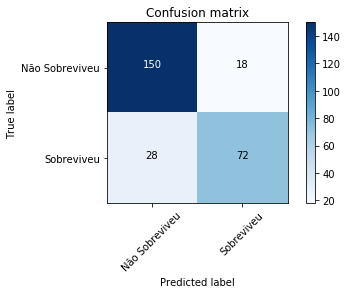

In [89]:
#sudo -H pip3 install --upgrade theano nolearn
#sudo -H pip3 install git+https://github.com/Lasagne/Lasagne.git

#http://stackoverflow.com/questions/30034492/does-nolearn-lasagne-support-python-3
#https://gist.github.com/dnouri/fe855653e9757e1ce8c4
#https://github.com/dnouri/nolearn/issues/62

#https://github.com/dnouri/nolearn/blob/master/nolearn/lasagne/base.py
#https://github.com/Lasagne/Lasagne/blob/master/lasagne/objectives.py

#http://nbviewer.ipython.org/github/ottogroup/kaggle/blob/master/Otto_Group_Competition.ipynb
#http://danielnouri.org/notes/2014/12/17/using-convolutional-neural-nets-to-detect-facial-keypoints-tutorial/

#https://github.com/IssamLaradji/NeuralNetworks/tree/master/multilayer_perceptron
#https://github.com/fchollet/keras

import lasagne
import nolearn
from nolearn.lasagne import NeuralNet, BatchIterator

clf_lsgn_layers = [('input', lasagne.layers.InputLayer),
                  #('input', lasagne.layers.InputLayer(shape=(None, X.shape[1])))
                  #('dropout0', lasagne.layers.DropoutLayer),
                  ('dense0', lasagne.layers.DenseLayer),
                  ('dropout1', lasagne.layers.DropoutLayer),#
                  ('dense1', lasagne.layers.DenseLayer),
                  #('dropout2', lasagne.layers.DropoutLayer),#
                  ('output', lasagne.layers.DenseLayer)]

#l = InputLayer(shape=(None, X.shape[1]))
#l = DenseLayer(l, num_units=len(np.unique(y)), nonlinearity=softmax)
#net = NeuralNet(l, update_learning_rate=0.01)

clf_lsgn = nolearn.lasagne.NeuralNet(layers=clf_lsgn_layers,
                                     input_shape=(None, X_traincv.shape[1]), #num_features
                                     #dropout0_p=0.5, #0.15                 
                                     dense0_num_units=200,
                                     dropout1_p=0.25,
                                     dense1_num_units=200,
                                     #dropout2_p=0.25,
                                     output_num_units=len(np.unique(y_traincv)), #num_classes
                                     output_nonlinearity=lasagne.nonlinearities.softmax,
                                     #update=lasagne.updates.adagrad,
                                     update=lasagne.updates.nesterov_momentum,
                                     update_momentum=0.5, #0.9 #only used with nesterov_momentum
                                     update_learning_rate=0.01,
                                     train_split=nolearn.lasagne.TrainSplit(eval_size=0.2), #split
                                     verbose=1,
                                     max_epochs=200, #To tune,verify the behaviour of outputs
                                     )

clf_lsgn.fit(X_traincv.astype(np.float32), y_traincv.astype(np.int32))

roc_lsgn = clf_eval(clf_lsgn, X_testcv.astype(np.float32), y_testcv.astype(np.int32))

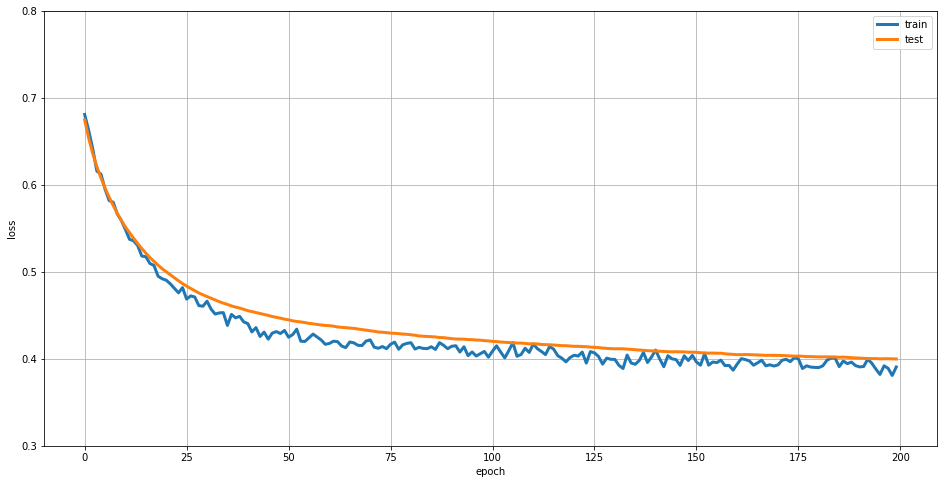

In [90]:
train_loss = np.array([i["train_loss"] for i in clf_lsgn.train_history_])
valid_loss = np.array([i["valid_loss"] for i in clf_lsgn.train_history_])
plt.figure(figsize=(16,8))
plt.plot(train_loss, linewidth=3, label="train")
plt.plot(valid_loss, linewidth=3, label="test")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
#plt.ylim(1e-1, 1e1)
plt.ylim(0.3, 0.8)
#plt.yscale("log")
plt.show()

#### Theano Neural Networks (with  Lasagne layers)

In [91]:
#http://lasagne.readthedocs.org/en/latest/
#http://lasagne.readthedocs.org/en/latest/user/tutorial.html
#https://github.com/Lasagne
#https://martin-thoma.com/lasagne-for-python-newbies/
#http://deeplearning.net/tutorial/
#http://deeplearning.net/software/theano/tutorial/
#http://cs231n.github.io/
#http://neuralnetworksanddeeplearning.com/

import theano
import theano.tensor as T
#import lasagne

def build_mlp(input_var=None):
    l_in = lasagne.layers.InputLayer(shape=X_traincv.shape, input_var=input_var)
    l_in_drop = lasagne.layers.DropoutLayer(l_in, p=0.2)
    l_hid1 = lasagne.layers.DenseLayer(l_in_drop, 
                                       num_units=800,
                                       nonlinearity=lasagne.nonlinearities.rectify,
                                       W=lasagne.init.GlorotUniform())
    l_hid1_drop = lasagne.layers.DropoutLayer(l_hid1, p=0.6)
    l_hid2 = lasagne.layers.DenseLayer(l_hid1_drop,
                                       num_units=800,
                                       nonlinearity=lasagne.nonlinearities.rectify)
    l_hid2_drop = lasagne.layers.DropoutLayer(l_hid2, p=0.6)
    l_out = lasagne.layers.DenseLayer(l_hid2_drop,
                                      num_units=10,
                                      nonlinearity=lasagne.nonlinearities.softmax)
    return l_out

def build_custom_mlp(input_var=None, depth=2, width=800, drop_input=.2, drop_hidden=.5):
    # Input layer and dropout (with shortcut `dropout` for `DropoutLayer`):
    network = lasagne.layers.InputLayer(shape=X_traincv.shape, input_var=input_var)
    if drop_input:
        network = lasagne.layers.dropout(network, p=drop_input)
    
    # Hidden layers and dropout:
    nonlin = lasagne.nonlinearities.rectify
    for _ in range(depth):
        network = lasagne.layers.DenseLayer(network, 
                                            width, 
                                            nonlinearity=nonlin)
    if drop_hidden:
        network = lasagne.layers.dropout(network, p=drop_hidden)
    
    # Output layer:
    softmax = lasagne.nonlinearities.softmax
    network = lasagne.layers.DenseLayer(network, 10, nonlinearity=softmax)
    return network

def build_cnn(input_var=None):
    network = lasagne.layers.InputLayer(shape=X_traincv.shape,
                                        input_var=input_var)
    network = lasagne.layers.Conv2DLayer(network,
                                         num_filters=32,
                                         filter_size=(5, 5),
                                         nonlinearity=lasagne.nonlinearities.rectify,
                                         W=lasagne.init.GlorotUniform())
    network = lasagne.layers.MaxPool2DLayer(network, pool_size=(2, 2))
    network = lasagne.layers.Conv2DLayer(network, 
                                         num_filters=32,
                                         filter_size=(5, 5),
                                         nonlinearity=lasagne.nonlinearities.rectify)
    network = lasagne.layers.MaxPool2DLayer(network, pool_size=(2, 2))
    network = lasagne.layers.DenseLayer(lasagne.layers.dropout(network, p=.5),
                                        num_units=256,
                                        nonlinearity=lasagne.nonlinearities.rectify)
    network = lasagne.layers.DenseLayer(lasagne.layers.dropout(network, p=.5),
                                        num_units=10,
                                        nonlinearity=lasagne.nonlinearities.softmax)
    return network

In [92]:
# Prepare Theano variables for inputs and targets
input_var = T.matrix('inputs')
target_var = T.ivector('targets')

# Create neural network model
network = build_mlp(input_var)
prediction = lasagne.layers.get_output(network)
loss = lasagne.objectives.categorical_crossentropy(prediction, target_var)
loss = loss.mean()
params = lasagne.layers.get_all_params(network, trainable=True)
updates = lasagne.updates.nesterov_momentum(loss,
                                            params,
                                            learning_rate=0.01, 
                                            momentum=0.9)
# Monitoring progress during training
test_prediction = lasagne.layers.get_output(network, deterministic=True)
test_loss = lasagne.objectives.categorical_crossentropy(test_prediction, target_var)
test_loss = test_loss.mean()
test_acc = T.mean(T.eq(T.argmax(test_prediction, axis=1), target_var),
                  dtype=theano.config.floatX)

# Compilation
train_fn = theano.function([input_var, target_var], loss, updates=updates, allow_input_downcast=True)
val_fn = theano.function([input_var, target_var], [test_loss, test_acc], allow_input_downcast=True)

In [93]:
num_epochs = 150
for epoch in range(num_epochs):
    # In each epoch, we do a full pass over the training data:
    train_err = 0
    start_time = time.time()
    inputs, targets = X_traincv, y_traincv
    train_err += train_fn(inputs, targets)
    
    # And a full pass over the validation data:
    val_err = 0
    val_acc = 0
    inputs, targets = X_testcv, y_testcv
    err, acc = val_fn(inputs, targets)
    val_err += err
    val_acc += acc
    
    # Then we print the results for this epoch:
    print("Epoch {} of {} took {:.3f}s".format(epoch + 1, num_epochs, time.time() - start_time))
    print("  training loss:\t\t{:.6f}".format(train_err))
    print("  validation loss:\t\t{:.6f}".format(val_err))
    print("  validation accuracy:\t\t{:.2f} %".format(val_acc * 100))

Epoch 1 of 150 took 0.199s
  training loss:		2.410224
  validation loss:		2.284812
  validation accuracy:		18.66 %
Epoch 2 of 150 took 0.220s
  training loss:		2.338553
  validation loss:		2.196511
  validation accuracy:		51.49 %
Epoch 3 of 150 took 0.190s
  training loss:		2.212524
  validation loss:		2.089820
  validation accuracy:		61.57 %
Epoch 4 of 150 took 0.189s
  training loss:		2.090223
  validation loss:		1.969579
  validation accuracy:		64.18 %
Epoch 5 of 150 took 0.198s
  training loss:		1.957248
  validation loss:		1.839487
  validation accuracy:		63.43 %
Epoch 6 of 150 took 0.198s
  training loss:		1.807040
  validation loss:		1.705830
  validation accuracy:		63.06 %
Epoch 7 of 150 took 0.188s
  training loss:		1.643188
  validation loss:		1.572412
  validation accuracy:		63.06 %
Epoch 8 of 150 took 0.187s
  training loss:		1.491279
  validation loss:		1.442697
  validation accuracy:		64.55 %
Epoch 9 of 150 took 0.199s
  training loss:		1.351717
  validation loss:		1.3197

In [94]:
test_err = 0
test_acc = 0
inputs, targets = X_testcv, y_testcv
err, acc = val_fn(inputs, targets)
test_err += err
test_acc += acc
print("Final results:")
print("  test loss:\t\t\t{:.6f}".format(test_err))
print("  test accuracy:\t\t{:.2f} %".format(test_acc * 100))

Final results:
  test loss:			0.433231
  test accuracy:		81.72 %


#### Genetic Algorithms

In [95]:
# https://github.com/rhiever/tpot
# https://github.com/rhiever/tpot/blob/master/tutorials/Titanic_Kaggle.ipynb

from tpot import TPOTClassifier

Optimization Progress: 100%|██████████| 200/200 [00:44<00:00,  4.55pipeline/s]

Generation 1 - Current best internal CV score: 0.8266664618535586


Optimization Progress: 100%|██████████| 300/300 [01:09<00:00,  6.52pipeline/s]

Generation 2 - Current best internal CV score: 0.8266664618535586


Optimization Progress: 100%|██████████| 400/400 [01:43<00:00,  5.84pipeline/s]

Generation 3 - Current best internal CV score: 0.8267047619047618


Optimization Progress: 100%|██████████| 500/500 [02:15<00:00,  3.51pipeline/s]

Generation 4 - Current best internal CV score: 0.8281763440860216


Optimization Progress: 100%|██████████| 600/600 [02:57<00:00,  3.39pipeline/s]

Generation 5 - Current best internal CV score: 0.8281763440860216


Optimization Progress: 100%|██████████| 700/700 [03:36<00:00,  4.57pipeline/s]

Generation 6 - Current best internal CV score: 0.8281763440860216


Optimization Progress: 100%|██████████| 800/800 [04:17<00:00,  3.01pipeline/s]

Generation 7 - Current best internal CV score: 0.828189247311828


Optimization Progress: 100%|██████████| 900/900 [04:50<00:00,  4.50pipeline/s]

Generation 8 - Current best internal CV score: 0.8282275473630312


Optimization Progress: 100%|██████████| 1000/1000 [05:19<00:00,  5.30pipeline/s]

Generation 9 - Current best internal CV score: 0.8282660522273426


Optimization Progress: 100%|██████████| 1100/1100 [05:40<00:00,  5.96pipeline/s]

Generation 10 - Current best internal CV score: 0.8283047619047619


Optimization Progress: 100%|██████████| 1200/1200 [06:08<00:00,  4.15pipeline/s]

Generation 11 - Current best internal CV score: 0.8314406554019458


Optimization Progress: 100%|██████████| 1300/1300 [06:29<00:00,  4.45pipeline/s]

Generation 12 - Current best internal CV score: 0.8314406554019458


Optimization Progress: 100%|██████████| 1400/1400 [06:57<00:00,  4.97pipeline/s]

Generation 13 - Current best internal CV score: 0.831504761904762


Optimization Progress: 100%|██████████| 1500/1500 [07:11<00:00,  7.92pipeline/s]

Generation 14 - Current best internal CV score: 0.8378025601638506


Optimization Progress: 100%|██████████| 1600/1600 [07:33<00:00,  5.72pipeline/s]

Generation 15 - Current best internal CV score: 0.8378025601638506


Optimization Progress: 100%|██████████| 1700/1700 [08:00<00:00,  5.53pipeline/s]

Generation 16 - Current best internal CV score: 0.8378025601638506


Optimization Progress: 100%|██████████| 1800/1800 [08:31<00:00,  6.15pipeline/s]

Generation 17 - Current best internal CV score: 0.8378025601638506


Optimization Progress: 100%|██████████| 1900/1900 [09:00<00:00,  4.90pipeline/s]

Generation 18 - Current best internal CV score: 0.8378025601638506


Optimization Progress: 100%|██████████| 2000/2000 [09:35<00:00,  4.08pipeline/s]

Generation 19 - Current best internal CV score: 0.8378025601638506


Optimization Progress: 100%|██████████| 2100/2100 [10:14<00:00,  3.48pipeline/s]

Generation 20 - Current best internal CV score: 0.8378025601638506


Optimization Progress: 100%|██████████| 2200/2200 [10:48<00:00,  3.67pipeline/s]

Generation 21 - Current best internal CV score: 0.8378025601638506


Optimization Progress: 100%|██████████| 2300/2300 [11:24<00:00,  3.76pipeline/s]

Generation 22 - Current best internal CV score: 0.8378025601638506


Optimization Progress: 100%|██████████| 2400/2400 [12:01<00:00,  4.71pipeline/s]

Generation 23 - Current best internal CV score: 0.8378922683051716


Optimization Progress: 100%|██████████| 2500/2500 [12:32<00:00,  4.11pipeline/s]

Generation 24 - Current best internal CV score: 0.8378922683051716


Optimization Progress: 100%|██████████| 2600/2600 [13:06<00:00,  3.35pipeline/s]

Generation 25 - Current best internal CV score: 0.8378922683051716


Optimization Progress: 100%|██████████| 2700/2700 [13:43<00:00,  4.08pipeline/s]

Generation 26 - Current best internal CV score: 0.8378922683051716


Optimization Progress: 100%|██████████| 2800/2800 [14:16<00:00,  5.05pipeline/s]

Generation 27 - Current best internal CV score: 0.8378922683051716


Optimization Progress: 100%|██████████| 2900/2900 [14:46<00:00,  4.21pipeline/s]

Generation 28 - Current best internal CV score: 0.8378922683051716


Optimization Progress: 100%|██████████| 3000/3000 [15:15<00:00,  4.02pipeline/s]

Generation 29 - Current best internal CV score: 0.8378922683051716


Optimization Progress: 100%|██████████| 3100/3100 [15:50<00:00,  4.03pipeline/s]

Generation 30 - Current best internal CV score: 0.8378922683051716


Optimization Progress: 100%|██████████| 3200/3200 [16:18<00:00,  5.23pipeline/s]

Generation 31 - Current best internal CV score: 0.8378922683051716


Optimization Progress: 100%|██████████| 3300/3300 [16:50<00:00,  4.52pipeline/s]

Generation 32 - Current best internal CV score: 0.8378922683051716


Optimization Progress: 100%|██████████| 3400/3400 [17:24<00:00,  2.84pipeline/s]

Generation 33 - Current best internal CV score: 0.8378922683051716


Optimization Progress: 100%|██████████| 3500/3500 [17:57<00:00,  3.96pipeline/s]

Generation 34 - Current best internal CV score: 0.8378922683051716


Optimization Progress: 100%|██████████| 3600/3600 [18:29<00:00,  3.05pipeline/s]

Generation 35 - Current best internal CV score: 0.8378922683051716


Optimization Progress: 100%|██████████| 3700/3700 [18:59<00:00,  3.05pipeline/s]

Generation 36 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 3800/3800 [19:27<00:00,  3.40pipeline/s]

Generation 37 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 3900/3900 [19:56<00:00,  3.54pipeline/s]

Generation 38 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 4000/4000 [20:34<00:00,  2.86pipeline/s]

Generation 39 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 4100/4100 [21:09<00:00,  4.70pipeline/s]

Generation 40 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 4200/4200 [21:48<00:00,  2.85pipeline/s]

Generation 41 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 4300/4300 [22:31<00:00,  3.91pipeline/s]

Generation 42 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 4400/4400 [23:05<00:00,  4.18pipeline/s]

Generation 43 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 4500/4500 [23:44<00:00,  3.18pipeline/s]

Generation 44 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 4600/4600 [24:27<00:00,  2.55pipeline/s]

Generation 45 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 4700/4700 [25:01<00:00,  2.79pipeline/s]

Generation 46 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 4800/4800 [25:43<00:00,  2.87pipeline/s]

Generation 47 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 4900/4900 [26:12<00:00,  3.56pipeline/s]

Generation 48 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 5000/5000 [26:44<00:00,  3.15pipeline/s]

Generation 49 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 5100/5100 [27:14<00:00,  3.18pipeline/s]

Generation 50 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 5200/5200 [27:44<00:00,  3.42pipeline/s]

Generation 51 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 5300/5300 [28:13<00:00,  4.17pipeline/s]

Generation 52 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 5400/5400 [28:43<00:00,  2.56pipeline/s]

Generation 53 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 5500/5500 [29:11<00:00,  3.63pipeline/s]

Generation 54 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 5600/5600 [29:43<00:00,  2.36pipeline/s]

Generation 55 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 5700/5700 [30:18<00:00,  4.01pipeline/s]

Generation 56 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 5800/5800 [30:41<00:00,  2.84pipeline/s]

Generation 57 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 5900/5900 [31:13<00:00,  3.09pipeline/s]

Generation 58 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 6000/6000 [31:40<00:00,  2.78pipeline/s]

Generation 59 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 6100/6100 [32:08<00:00,  3.21pipeline/s]

Generation 60 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 6200/6200 [32:37<00:00,  3.23pipeline/s]

Generation 61 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 6300/6300 [32:59<00:00,  3.86pipeline/s]

Generation 62 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 6400/6400 [33:20<00:00,  3.77pipeline/s]

Generation 63 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 6500/6500 [33:42<00:00,  3.52pipeline/s]

Generation 64 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 6600/6600 [34:04<00:00,  2.59pipeline/s]

Generation 65 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 6700/6700 [34:23<00:00,  3.25pipeline/s]

Generation 66 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 6800/6800 [34:47<00:00,  3.18pipeline/s]

Generation 67 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 6900/6900 [35:10<00:00,  2.96pipeline/s]

Generation 68 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 7000/7000 [35:36<00:00,  2.79pipeline/s]

Generation 69 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 7100/7100 [35:58<00:00,  2.41pipeline/s]

Generation 70 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 7200/7200 [36:16<00:00,  3.48pipeline/s]

Generation 71 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 7300/7300 [36:28<00:00,  2.85pipeline/s]

Generation 72 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 7400/7400 [36:44<00:00,  3.55pipeline/s]

Generation 73 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 7500/7500 [37:04<00:00,  2.57pipeline/s]

Generation 74 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 7600/7600 [37:23<00:00,  3.22pipeline/s]

Generation 75 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 7700/7700 [37:46<00:00,  2.78pipeline/s]

Generation 76 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 7800/7800 [38:01<00:00,  2.81pipeline/s]

Generation 77 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 7900/7900 [38:20<00:00,  2.53pipeline/s]

Generation 78 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 8000/8000 [38:44<00:00,  2.53pipeline/s]

Generation 79 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 8100/8100 [39:02<00:00,  3.15pipeline/s]

Generation 80 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 8200/8200 [39:19<00:00,  2.53pipeline/s]

Generation 81 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 8300/8300 [39:39<00:00,  3.31pipeline/s]

Generation 82 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 8400/8400 [39:52<00:00,  3.92pipeline/s]

Generation 83 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 8500/8500 [40:08<00:00,  3.25pipeline/s]

Generation 84 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 8600/8600 [40:22<00:00,  2.64pipeline/s]

Generation 85 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 8700/8700 [40:37<00:00,  3.24pipeline/s]

Generation 86 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 8800/8800 [40:51<00:00,  3.35pipeline/s]

Generation 87 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 8900/8900 [41:07<00:00,  2.85pipeline/s]

Generation 88 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 9000/9000 [41:18<00:00,  2.97pipeline/s]

Generation 89 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 9100/9100 [41:35<00:00,  2.68pipeline/s]

Generation 90 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 9200/9200 [41:51<00:00,  3.27pipeline/s]

Generation 91 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 9300/9300 [42:12<00:00,  2.81pipeline/s]

Generation 92 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 9400/9400 [42:30<00:00,  1.87pipeline/s]

Generation 93 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 9500/9500 [42:45<00:00,  2.64pipeline/s]

Generation 94 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 9600/9600 [43:00<00:00,  2.63pipeline/s]

Generation 95 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 9700/9700 [43:13<00:00,  2.87pipeline/s]

Generation 96 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 9800/9800 [43:29<00:00,  2.77pipeline/s]

Generation 97 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 9900/9900 [43:48<00:00,  2.34pipeline/s]

Generation 98 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 10000/10000 [44:02<00:00,  2.80pipeline/s]

Generation 99 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 10100/10100 [44:26<00:00,  2.14pipeline/s]

Generation 100 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 10200/10200 [44:43<00:00,  2.77pipeline/s]

Generation 101 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 10300/10300 [44:56<00:00,  3.02pipeline/s]

Generation 102 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 10400/10400 [45:10<00:00,  2.83pipeline/s]

Generation 103 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 10500/10500 [45:25<00:00,  3.16pipeline/s]

Generation 104 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 10600/10600 [45:38<00:00,  2.54pipeline/s]

Generation 105 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 10700/10700 [45:58<00:00,  1.88pipeline/s]

Generation 106 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 10800/10800 [46:17<00:00,  1.94pipeline/s]

Generation 107 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 10900/10900 [46:32<00:00,  2.75pipeline/s]

Generation 108 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 11000/11000 [46:49<00:00,  2.81pipeline/s]

Generation 109 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 11100/11100 [47:04<00:00,  2.73pipeline/s]

Generation 110 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 11200/11200 [47:19<00:00,  3.05pipeline/s]

Generation 111 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 11300/11300 [47:33<00:00,  1.96pipeline/s]

Generation 112 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 11400/11400 [47:48<00:00,  2.96pipeline/s]

Generation 113 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 11500/11500 [48:06<00:00,  2.10pipeline/s]

Generation 114 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 11600/11600 [48:20<00:00,  1.89pipeline/s]

Generation 115 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 11700/11700 [48:36<00:00,  3.12pipeline/s]

Generation 116 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 11800/11800 [48:49<00:00,  2.71pipeline/s]

Generation 117 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 11900/11900 [49:02<00:00,  3.17pipeline/s]

Generation 118 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 12000/12000 [49:19<00:00,  2.26pipeline/s]

Generation 119 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 12100/12100 [49:36<00:00,  2.51pipeline/s]

Generation 120 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 12200/12200 [49:50<00:00,  3.31pipeline/s]

Generation 121 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 12300/12300 [50:03<00:00,  2.47pipeline/s]

Generation 122 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 12400/12400 [50:21<00:00,  2.35pipeline/s]

Generation 123 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 12500/12500 [50:36<00:00,  3.16pipeline/s]

Generation 124 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 12600/12600 [50:56<00:00,  2.85pipeline/s]

Generation 125 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 12700/12700 [51:09<00:00,  3.23pipeline/s]

Generation 126 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 12800/12800 [51:24<00:00,  3.29pipeline/s]

Generation 127 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 12900/12900 [51:37<00:00,  2.65pipeline/s]

Generation 128 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 13000/13000 [51:51<00:00,  2.30pipeline/s]

Generation 129 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 13100/13100 [52:08<00:00,  2.35pipeline/s]

Generation 130 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 13200/13200 [52:26<00:00,  2.88pipeline/s]

Generation 131 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 13300/13300 [52:38<00:00,  1.85pipeline/s]

Generation 132 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 13400/13400 [52:52<00:00,  3.09pipeline/s]

Generation 133 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 13500/13500 [53:08<00:00,  1.91pipeline/s]

Generation 134 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 13600/13600 [53:27<00:00,  2.84pipeline/s]

Generation 135 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 13700/13700 [53:43<00:00,  2.26pipeline/s]

Generation 136 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 13800/13800 [53:58<00:00,  2.55pipeline/s]

Generation 137 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 13900/13900 [54:13<00:00,  1.45pipeline/s]

Generation 138 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 14000/14000 [54:28<00:00,  2.85pipeline/s]

Generation 139 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 14100/14100 [54:39<00:00,  1.86pipeline/s]

Generation 140 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 14200/14200 [54:59<00:00,  2.69pipeline/s]

Generation 141 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 14300/14300 [55:15<00:00,  3.41pipeline/s]

Generation 142 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 14400/14400 [55:25<00:00,  2.23pipeline/s]

Generation 143 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 14500/14500 [55:37<00:00,  2.37pipeline/s]

Generation 144 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 14600/14600 [55:52<00:00,  2.37pipeline/s]

Generation 145 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 14700/14700 [56:07<00:00,  3.11pipeline/s]

Generation 146 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 14800/14800 [56:24<00:00,  2.08pipeline/s]

Generation 147 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 14900/14900 [56:39<00:00,  3.23pipeline/s]

Generation 148 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 15000/15000 [56:54<00:00,  2.28pipeline/s]

Generation 149 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 15100/15100 [57:10<00:00,  2.56pipeline/s]

Generation 150 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 15200/15200 [57:21<00:00,  2.47pipeline/s]

Generation 151 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 15300/15300 [57:37<00:00,  2.93pipeline/s]

Generation 152 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 15400/15400 [57:51<00:00,  2.75pipeline/s]

Generation 153 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 15500/15500 [58:06<00:00,  3.30pipeline/s]

Generation 154 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 15600/15600 [58:19<00:00,  2.06pipeline/s]

Generation 155 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 15700/15700 [58:32<00:00,  3.07pipeline/s]

Generation 156 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 15800/15800 [58:44<00:00,  2.01pipeline/s]

Generation 157 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 15900/15900 [59:00<00:00,  2.06pipeline/s]

Generation 158 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 16000/16000 [59:18<00:00,  2.28pipeline/s]

Generation 159 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 16100/16100 [59:32<00:00,  2.69pipeline/s]

Generation 160 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 16200/16200 [59:48<00:00,  2.67pipeline/s]

Generation 161 - Current best internal CV score: 0.8394922683051715


Optimization Progress: 100%|██████████| 16300/16300 [1:00:05<00:00,  2.29pipeline/s]

Generation 162 - Current best internal CV score: 0.8394922683051715



TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingClassifier(MaxAbsScaler(input_matrix), GradientBoostingClassifier__learning_rate=DEFAULT, GradientBoostingClassifier__max_depth=5, GradientBoostingClassifier__max_features=0.95, GradientBoostingClassifier__min_samples_leaf=14, GradientBoostingClassifier__min_samples_split=17, GradientBoostingClassifier__n_estimators=DEFAULT, GradientBoostingClassifier__subsample=0.4)
Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.84      0.89      0.86       168
    Sobreviveu       0.80      0.71      0.75       100

   avg / total       0.82      0.82      0.82       268

ROC Score: 0.8014285714285715
Accuracy Score: 0.8246268656716418
Average Precision Score: 0.8079808821063222
f1 Score: 0.7513227513227513
Confusion matrix, without normalization
[[150  18]
 [ 29  71]]


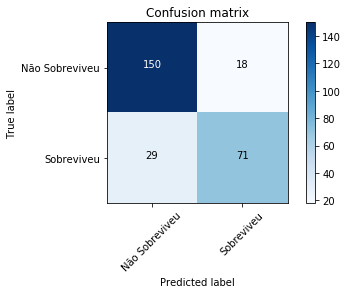

In [97]:
clf_tpot = TPOTClassifier(verbosity=2, 
                          max_time_mins=40, 
                          max_eval_time_mins=15, 
                          population_size=100,
                          generations=100).fit(X_traincv, y_traincv)
                          
roc_tpot = clf_eval(clf_tpot, X_testcv, y_testcv)

[WARNING] [2017-05-26 12:01:06,387:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-05-26 12:01:06,387:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


You are already timing task: index_run2
You are already timing task: index_run3
You are already timing task: index_run3
You are already timing task: index_run3
You are already timing task: index_run3
You are already timing task: index_run3
You are already timing task: index_run3


Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.84      0.88      0.85       168
    Sobreviveu       0.77      0.71      0.74       100

   avg / total       0.81      0.81      0.81       268

ROC Score: 0.7925
Accuracy Score: 0.8134328358208955
Average Precision Score: 0.7949740428293317
f1 Score: 0.7395833333333333
Confusion matrix, without normalization
[[147  21]
 [ 29  71]]


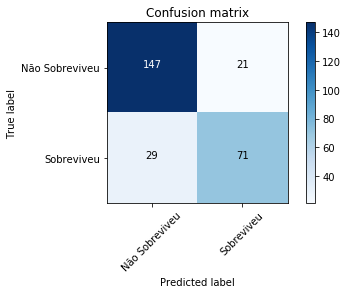

In [98]:
# https://github.com/automl/auto-sklearn

import autosklearn.classification as asklclf
clf_autoskl = asklclf.AutoSklearnClassifier(time_left_for_this_task=60,
                                            per_run_time_limit=30,
                                            seed=0).fit(X_traincv, 
                                                        y_traincv, 
                                                        metric=autosklearn.metrics.accuracy)

roc_autoskl = clf_eval(clf_autoskl, X_testcv, y_testcv)

#### Voting Classifier

[WARNING] [2017-05-26 12:10:33,399:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2017-05-26 12:10:33,399:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


You are already timing task: index_run2
You are already timing task: index_run3
You are already timing task: index_run3
You are already timing task: index_run3
You are already timing task: index_run3
You are already timing task: index_run3
You are already timing task: index_run3
You are already timing task: index_run3
Optimization Progress: 100%|██████████| 200/200 [00:45<00:00,  6.21pipeline/s]

Generation 1 - Current best internal CV score: 0.8249380440348182


Optimization Progress: 100%|██████████| 300/300 [01:36<00:00,  3.61pipeline/s]

Generation 2 - Current best internal CV score: 0.8249380440348182


Optimization Progress: 100%|██████████| 400/400 [02:38<00:00,  2.86pipeline/s]

Generation 3 - Current best internal CV score: 0.8249380440348182


Optimization Progress: 100%|██████████| 500/500 [03:54<00:00,  2.61pipeline/s]

Generation 4 - Current best internal CV score: 0.8249894521249359


Optimization Progress: 100%|██████████| 600/600 [05:09<00:00,  2.51pipeline/s]

Generation 5 - Current best internal CV score: 0.8266023553507426


Optimization Progress: 100%|██████████| 700/700 [06:12<00:00,  2.87pipeline/s]

Generation 6 - Current best internal CV score: 0.8266662570404506


Optimization Progress: 100%|██████████| 800/800 [07:41<00:00,  2.37pipeline/s]

Generation 7 - Current best internal CV score: 0.8281382488479263



TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=DEFAULT, RandomForestClassifier__criterion=DEFAULT, RandomForestClassifier__max_features=0.5, RandomForestClassifier__min_samples_leaf=5, RandomForestClassifier__min_samples_split=13, RandomForestClassifier__n_estimators=100)
Classification Report
                precision    recall  f1-score   support

Não Sobreviveu       0.85      0.89      0.87       168
    Sobreviveu       0.80      0.74      0.77       100

   avg / total       0.83      0.84      0.83       268

ROC Score: 0.8164285714285714
Accuracy Score: 0.835820895522388
Average Precision Score: 0.8206813757300455
f1 Score: 0.7708333333333333
Confusion matrix, without normalization
[[150  18]
 [ 26  74]]


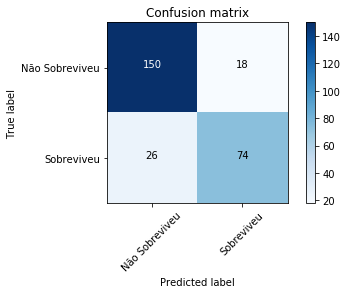

In [104]:
from sklearn.ensemble import VotingClassifier 
#http://scikit-learn.org/stable/modules/ensemble.html#votingclassifier

ensemble = VotingClassifier(estimators=[#('clf_sgdc', clf_sgdc),
                                        ('clf_lgr', clf_lr),
                                        #('clf_rdg', clf_rdg),
                                        ('clf_bgc', clf_bgc),
                                        ('clf_etc', clf_etc),
                                        ('clf_abc', clf_abc),
                                        #('clf_pct', clf_pcp),
                                        ('clf_xgb', clf_xgb),
                                        ('clf_rf', clf_rf),
                                        ('clf_etc', clf_etc),
                                        ('clf_knn', clf_knn),
                                        ('clf_autoskl', clf_autoskl),
                                        ('clf_tpot', clf_tpot),
                                        ],
                            voting='soft',
                            weights=[1,2,1,6,1,3,1,1,1,1]).fit(X_traincv, y_traincv)

roc_ens = clf_eval(ensemble, X_testcv, y_testcv)

### Plotting the results:  

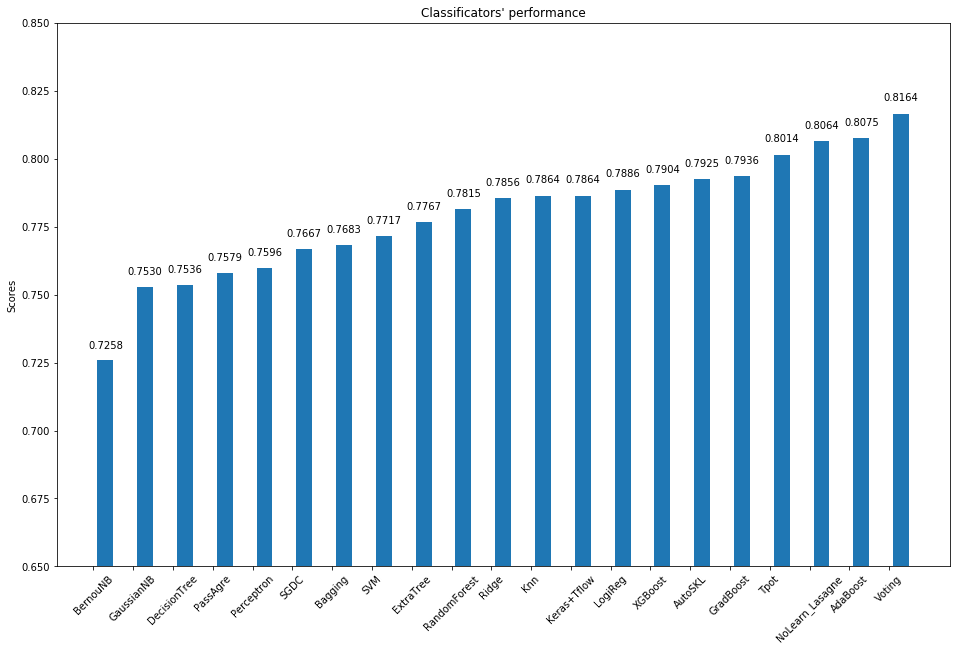

In [105]:
dic_results = {'SVM': roc_svc2,
               'RandomForest': roc_rf,
               'DecisionTree': roc_dtc,
               'ExtraTree': roc_etc,
               'AdaBoost': roc_abc,
               'GradBoost': roc_gbc,
               'SGDC': roc_sgdc,
               'Ridge': roc_rdg,
               'Perceptron': roc_pcp,
               'PassAgre': roc_pac,
               'LogiReg': roc_lr,
               'GaussianNB': roc_gnb,
               'BernouNB': roc_bnb,
               'NoLearn_Lasagne': roc_lsgn,
               #'Theano': roc_thn,
               'XGBoost':roc_xgb,
               'Knn':roc_knn,
               'Keras+Tflow': roc_keras,
               'Bagging': roc_bgc,
               'Voting': roc_ens,
               'Tpot': roc_tpot,
               'AutoSKL': roc_autoskl,
              }

import operator
tup_results = sorted(dic_results.items(), key=operator.itemgetter(1))

N = len(dic_results)
ind = np.arange(N)  # the x locations for the groups
width = 0.40       # the width of the bars

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
rects = ax.bar(ind+0.5, list(zip(*tup_results))[1], width,)
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2., 
            1.005*height, 
            '{0:.4f}'.format(height), 
            ha='center', 
            va='bottom',)

ax.set_ylabel('Scores')
ax.set_ylim(ymin=0.65,ymax = 0.85)
ax.set_title("Classificators' performance")
ax.set_xticks(ind + width/2.)
ax.set_xticklabels(list(zip(*tup_results))[0], rotation=45)

plt.show()

Choosing the best classifier and training with all training data:

In [106]:
output = ensemble.predict(X_test)
print(output[10:20])
print()
output_prob = ensemble.predict_proba(X_test)
print(output_prob[10:20])

[ 0.  0.  1.  0.  1.  1.  0.  0.  0.  0.]

[[ 0.70053177  0.29946823]
 [ 0.79773823  0.20226177]
 [ 0.03288359  0.96711641]
 [ 1.09436164 -0.09436164]
 [ 0.05466978  0.94533021]
 [ 0.13098049  0.86901951]
 [ 0.85710362  0.14289638]
 [ 0.63962475  0.36037524]
 [ 0.74971996  0.25028004]
 [ 0.87219638  0.12780362]]
